# Credit Analysis
**You will:** Parse and format weird data into an easy to use format, analyze the data, and build a simple predictive model based on the data. <br />
**Leading question:** What kind of people's loans get approved by this bank? <br />

### Setting up your environment if you don't have one already:
Download Anaconda Individual Edition: https://www.anaconda.com/products/distribution <br />
Troubleshooting Docs: https://docs.anaconda.com/anaconda/install/ <br />

# Load, Parse, and Format Data
Basic data description in *credit.names* <br />
Data to parse in *credit.txt* <br />

In [2]:
# Some libraries you may find useful
import re # for string manipulation
import pandas as pd

# Open and read in credit.txt
SIZE = 125
df = pd.DataFrame()
with open("credit.txt", 'r') as file:
    categories = ("approved", "unemployed", "purchase", "male", "female", "married", "problem_region", "age", "account_size", "loan_size", "payoff_months", "year_at_company")
    text = file.read()
    # print(text.split(":pos"))
    index = 0
    for subject in text.split(":pos\n  (")[1:]:
        # print(data.split(" ", 4)[1])
        data = re.findall('\(([^)]+)', subject[:subject.index("))")])
        results = [0] * SIZE
        for datum in data:
            words = datum.split()
            # print(words)
            if len(words) == 1:
                results[int(words[0][1:])-1] = 1
            elif len(words):
                try:
                    results[int(words[0][1:])-1] = int(words[1])
                except:
                    results[int(words[0][1:])-1] = words[1]
        df[categories[index]] = results
        index += 1

df.to_csv("creditData.csv")

# Parse lines in credit.txt to extract and format data on each person (s1 refers to person 1 in credit.txt)
# Will require string formatting logic, try to do as little repetitive manual parsing as possible
# Desired Data Columns for Each Person:
#   approved - 1 if loan was approved (pos in credit.txt), 0 if denied
#   unemployed - 1 if jobless, 0 if employed
#   purchase - intended purchase with loan (string)
#   gender - 1 for female, 0 for male
#   marriageStatus - 1 for married, 0 for unmarried
#   problematicRegion - 1 for being from a problematic region, 0 if not
#   age - age (int)
#   accountAmount - amount in their bank account in ten thousands of yen (int)
#   loanAmount - loan ammount in ten thousands of yen (int)
#   payoffMonths - number of months expected to pay off the loan (int)
#   yrsAtCompany - number of years worked at their current company (int)
...

# Reformat parsed data into appropriate pandas dataframe where index is the number of the person
...

# Desired result (note if you get stuck on parsing data, you can complete the next sections using df_example!):
df = pd.read_csv("creditData.csv", index_col=0)
df.head(10)

,approved,unemployed,purchase,male,female,married,problem_region,age,account_size,loan_size,payoff_months,year_at_company
0,1,0,pc,0,1,1,0,18,20,2,15,1
1,1,0,pc,0,1,1,0,20,10,2,20,2
2,0,1,pc,0,1,0,1,25,5,4,12,0
3,1,0,pc,0,1,0,0,40,5,7,12,2
4,1,0,pc,0,1,1,1,50,5,4,12,25
5,1,0,pc,1,0,1,0,18,10,5,8,1
6,1,0,pc,1,0,1,0,22,10,3,8,4
7,1,0,pc,1,0,0,0,28,15,4,10,5
8,1,0,pc,1,0,0,0,40,20,2,20,15
9,0,1,pc,1,0,0,0,50,5,4,12,0


# Analyze the Data
### What is the relationship between application characteristics and whether the loan was approved?
Come up with your own subquestions and analysis methods to describe the data.
Example subquestions for the effect of employment status on loan approval: 
- How many unemployed vs employed applicants had their loan approved? 
- What is the approval rate among the two groups? 
- What porportion of the sample does each group make up?

In [32]:
from matplotlib import pyplot as plt
# ("approved", "unemployed", "purchase", "male", "female", "married", "problem_region", "age", "account_size", "loan_size", "payoff_months", "year_at_company")

# Dataset statistics
print("dataset figures")
print(df.info())
print(df.describe())
print("approved percentage")
print(df.groupby('approved').mean())
# print(df.groupby('approved').pie())
plt.show()
print("correlation")
print(df.corr())
# print("Number of unemployed applicants whose loan was approved: ", len(df.loc[(df['approved'] == 1) & (df['unemployed'] == 1)])/len(df.loc[(df['unemployed'] == 1)]))


#

dataset figures
         approved  unemployed       male     female     married  \
count  125.000000  125.000000  125.00000  125.00000  125.000000   
mean     0.680000    0.112000    0.52000    0.48000    0.472000   
std      0.468353    0.316636    0.50161    0.50161    0.501224   
min      0.000000    0.000000    0.00000    0.00000    0.000000   
25%      0.000000    0.000000    0.00000    0.00000    0.000000   
50%      1.000000    0.000000    1.00000    0.00000    0.000000   
75%      1.000000    0.000000    1.00000    1.00000    1.000000   
max      1.000000    1.000000    1.00000    1.00000    1.000000   

       problem_region        age  account_size   loan_size  payoff_months  \
count      125.000000  125.00000    125.000000  125.000000     125.000000   
mean         0.112000   36.72000     69.464000   11.656000      13.144000   
std          0.316636   15.15756    109.941006   14.348825       5.622111   
min          0.000000   18.00000      1.000000    1.000000       4.00000

AttributeError: 'DataFrameGroupBy' object has no attribute 'pie'

# Build Predictive Model
Predict whether an applicant's loan will be approved given the applicant characteristics.
Potential things to consider:
- Which characteristics to use
- What models to try
- Addressing overfitting: train/test/validation sets (maybe use cross validation)
- What metrics are most relevant to use to compare models

Tree: 0.72 9.670921358369407


/Users/22staples/PycharmProjects/venvs/General/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/22staples/PycharmProjects/venvs/General/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

Neighbors: 0.72 9.670985326163821
SVM: 0.72 9.670985326163821


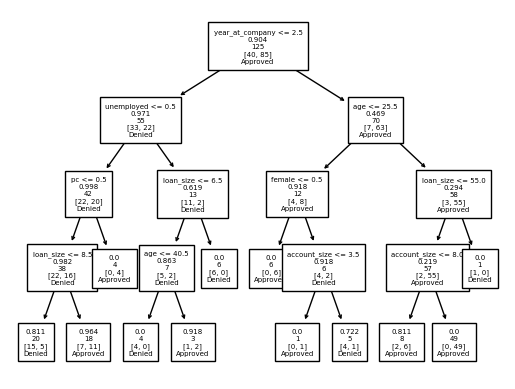

In [10]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score #for scoring metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

one_hot_encoding = pd.get_dummies(df["purchase"])
inputs = df.loc[:, [col not in ("purchase", "approved") for col in df.columns]].join(one_hot_encoding)
results = df['approved']

df = df.sample(frac=1).reset_index(drop=True)  # shuffle rows for training
train_inputs, test_inputs, train_results, test_results = inputs[:100], inputs[100:], results[:100], results[100:]


tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree.fit(train_inputs, train_results)
print("Tree:", accuracy_score(test_results, tree.predict(test_inputs)), log_loss(test_results, tree.predict(test_inputs)))

labels = list(df.columns[1:])+list(one_hot_encoding.columns)
labels.remove("purchase")
tree.fit(inputs, results)
plot_tree(tree, feature_names=labels, class_names=("Denied", "Approved"), label="none", fontsize=5)

neighbors = KNeighborsClassifier(5)
neighbors.fit(test_inputs, test_results)
print("Neighbors:", accuracy_score(test_results, neighbors.predict(test_inputs)), log_loss(test_results, neighbors.predict(test_inputs)))

svm = SVC(gamma=2, C=1)
svm.fit(train_inputs, train_results)
svm.predict(test_inputs)
print("SVM:", accuracy_score(test_results, neighbors.predict(test_inputs)), log_loss(test_results, neighbors.predict(test_inputs)))